In [2]:
import pandas as pd
import seaborn as sns

Logistic regression

In [3]:
x=pd.read_csv("train.csv")
y=pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [4]:
target=x.Survived

In [5]:
x.drop(columns="Survived",inplace=True)

In [6]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


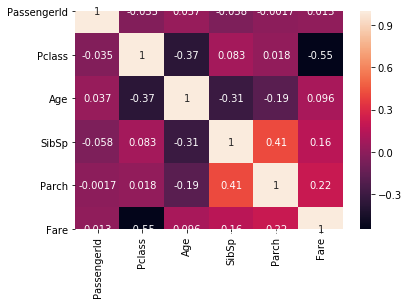

In [9]:
sns.heatmap(x.corr(),annot=True)

In [10]:
x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

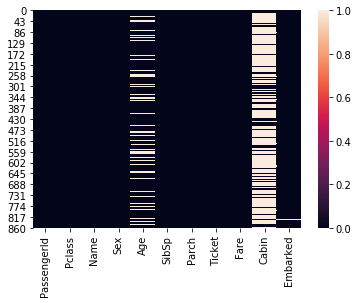

In [11]:
sns.heatmap(x.isnull())

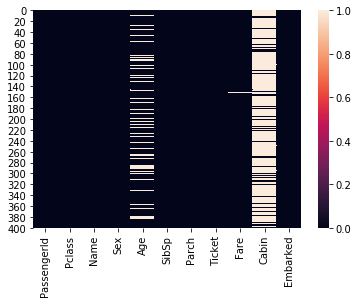

In [12]:
sns.heatmap(y.isnull())

In [13]:
y_id=y.PassengerId
y_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [14]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
drop=['PassengerId','Name','Ticket','Cabin', 'Embarked']

In [16]:
x.drop(columns=drop,inplace=True)
y.drop(columns=drop,inplace=True)

In [17]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [18]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [19]:
y=pd.get_dummies(y,drop_first=True)
y.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


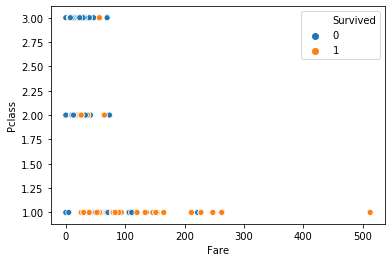

In [20]:
sns.scatterplot(x.Fare,x.Pclass,hue=target)

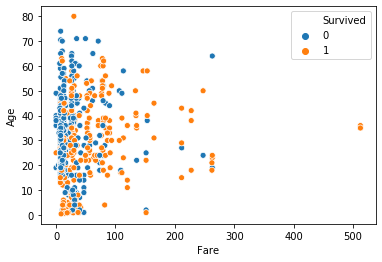

In [21]:
sns.scatterplot(x.Fare,x.Age,hue=target)

In [22]:
x.Fare[x.Fare>300]

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

In [23]:
x.Fare[x.Fare>300]=300

C:\Users\James Braganza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


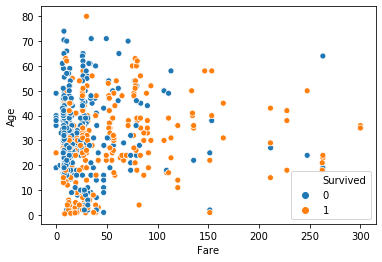

In [24]:
sns.scatterplot(x.Fare,x.Age,hue=target)

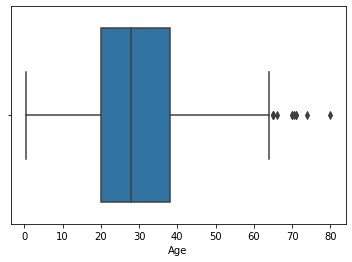

In [25]:
sns.boxplot(x.Age)

In [26]:
x.isnull().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_male      0
dtype: int64

In [27]:
y.isnull().sum()

Pclass       0
Age         86
SibSp        0
Parch        0
Fare         1
Sex_male     0
dtype: int64

In [28]:
x.fillna(x.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)

In [29]:
x.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

In [30]:
y.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [32]:
x_train,x_test,t_train,t_test=train_test_split(x,target,test_size=.25,random_state=0)

In [33]:
rf=RandomForestClassifier(random_state=1,n_estimators=200)

In [34]:
rf.fit(x_train,t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
result=rf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(t_test,result)

0.8251121076233184

In [37]:
parameters = {'n_estimators':[100, 150,200,250,300,350,400,450,500]}

In [38]:
gscv=GridSearchCV(estimator=rf,param_grid=parameters)

In [39]:
gscv.fit(x_train,t_train) 

C:\Users\James Braganza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [40]:
result_grid=gscv.predict(x_test)

In [41]:
accuracy_score(t_test,result_grid)

0.8340807174887892

In [42]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
gscv.best_params_

{'n_estimators': 350}

In [44]:
y.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [45]:
result_y=rf.predict(y)

In [46]:
final=pd.DataFrame({"PassengerId":y_id,"Survived":result_y})

In [47]:
final.to_csv("created_file_outliners.csv",index=False)

In [48]:
pd.read_csv("created_file_outliners.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [49]:
final.shape

(418, 2)

In [50]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
gender_submission.shape

(418, 2)

## Score on kaggle : 0.76315